# Computer Infrastructure - 2024

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7b/Athenry_Castle.jpg" alt="Athenry Castle" width="800"/>
<p class="attribution">"Athenry Castle" by <a href="https://commons.wikimedia.org/wiki/User:Imehling">Ingo Mehling</a> is licensed under <a rel="noopener noreferrer" href="https://creativecommons.org/licenses/by-sa/3.0/?ref=openverse">CC BY-SA 3.0 <img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" style="height: 1em; margin-right: 0.125em; display: inline;" /><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" style="height: 1em; margin-right: 0.125em; display: inline;" /><img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg" style="height: 1em; margin-right: 0.125em; display: inline;" /></a>.</p>

This notebook will provide a summary of how I completed the tasks for the [Computer Infrastructure](https://www.gmit.ie/computer-infrastructure) module as part of the [Higher Diploma in Science in Data Analytics](https://www.gmit.ie/higher-diploma-in-science-in-computing-in-data-analytics) at ATU.

### Task 1 - Create Directory Structure
> *Using the command line, create a directory named <code>data</code> at the root of your respository. Inside <code>data</code>, create two subdirectories: <code>timestamps</code> and <code>weather</code>.*

For this task, I opened a Codespace through my GitHub repository. Once the codespace was live, I used <code>mkdir</code> to create a folder named <code>data</code>. I then used <code>ls</code> to confirm that the folder had been created.

I used <code>cd data</code> to navigate into the <code>data</code> folder, where again I used <code>mkdir</code> to create two further directories called <code>timestamps</code> and <code>weather</code>.

I navigated back to my root folder using <code>cd ..</code> (as <code>..</code> is used to indicate the parent folder of the current directory).

### Task 2 - Timestamps
> *Navigate to the <code>data/timestamps</code> directory. Use the <code>date</code> command to output the current date and time, appending the output to a file named <code>now.txt</code>. Make sure to use the <code>>></code> operator to append (not overwrite) the file. Repeat this step ten times, then use the <code>more</code> command to verify that <code>now.txt</code> has the expected content.*

From my root directory, I used <code>cd</code> (using tab to autocomplete) to navigate into my <code>timestamps</code> directory. Running <code>date</code> in the command line displays the current moment in the format <code>Sat Nov 23 13:58:44 UTC 2024</code>. If I run the <code>date</code> comment with <code>>></code> operator (<code>date >> now.txt</code>) I can append the date into a file. Having run this command multiple times (using the up arrow to easily reselect the command), I can use <code>more now.txt</code> to confirm that the file has been appended with each timestamp.

### Task 3 - Formatting Timestamps
> Run the <code>date</code> command again, but this time format the output using <code>YYYYmmdd_HHMMSS</code> (e.g., <code>20261114_130003</code> for 1:00:03 PM on November 14, 2026). Refer to the <code>date</code> man page (using <code>man date</code>) for more formatting options. (Press <code>q</code> to exit the man page). Append the formatted output to a file named <code>formatted.txt</code>.

Using the structure <code>date +"%y%m%d_%H%M%S" >> formatted.txt</code>, I can prepare the <code>date</code> output to be formatted in a way that suits my needs. Reviewing the <code>man date</code> documentation, I can see the various ways that this can be formatted using the <code>%</code>, with a very broad range of customisation when it comes to formatting dates (<code>%a - abbreviated weekday (Sun)</code>; <code>%A - full weekday (Sunday)</code>; <code>%n - new line</code>; etc.)

### Task 4 - Create Timestamped Files
> Use the <code>touch</code> command to create an empty file with a name in the <code>YYYYmmdd_HHMMSS.txt</code> format. You can achieve this by embedding your <code>date</code> command in backticks <code>`</code> into the touch command. You should no longer use redirection (<code>>></code>) in this step.

Using the <code>touch</code> command allows me to create a file from the command line. Preparing it in the format <code>touch `date +"%y%m%d_%H%M%S"`.txt</code>, with backticks enclosing the date comments, will allow me to use the formatted output as the file name. 

### Task 5 - Download Today's Weather Data
> Change to the <code>data/weather</code> directory. Download the latest weather data for the Athenry weather station from Met Eireann using <code>wget</code>. Use the <code>-O <filename></code> option to save the file as <code>weather.json</code>. The data can be found at this URL:
<code>https://prodapi.metweb.ie/observations/athenry/today</code>.

I can navigate from the <code>timestamps</code> directory by using <code>cd ../weather</code>, as <code>..</code> is the parent of my current working directory. Given that the directory structure for this project is very simple, I know where the <code>weather</code> directory is stored very easily. Using <code>wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today</code> I can fetch the data from source and save it in my directory with the defined filename. Reading <code>man wget</code>, I can see that the <code>-O</code> modifier tells it to save the data as <code>weather.json</code>; without this is would likely default to saving it as the last part of the URL (in this case, <code>today</code>.)

### Task 6 - Timestamp the Data
> Modify the command from Task 5 to save the downloaded file with a timestamped name in the format <code>YYYYmmdd_HHMMSS</code>.json.

There is little to add here, other than highlighted that the task combines the actions in **Task 4** and **Task 5** to output a timestamped filename. This was done using the format <code>wget -O `date +"%Y%m%d_%H%M%S"`.json https://prodapi.metweb.ie/observations/athenry/today</code>.

### Task 7 - Write the Script
> Write a bash script called <code>weather.sh</code> in the root of your repository. This script should automate the process from Task 6, saving the weather data to the <code>data/weather</code> directory. Make the script executable and test it by running it.

Using some of the previously outlined commands, I navigated back to my root directory and used <code>touch weather.sh</code> to create a file that would be used to write my script. I then used <code>nano weather.sh</code> to open a text editor that would enable me to write my script:

```bash
#! /bin/bash

echo Downloading weather data
wget -O data/weather/$(date +"%Y%m%d_%H%M%S").json https://prodapi.metweb.ie/observations/athenry/today
echo Weather data downloaded
```

The shebang line (<code>#! /bin/bash</code>) specifies that the script should be run in the Bash shell, the <code>echo</code> lines print a message to the command line so I can track the progress of the command, and the <code>wget</code> line fetches the data and saves it in the assigned location. <code>$</code> executes the date command in the specific format and substitutes the result into the file name.

### Task 8 - Notebook
> Create a notebook called <code>weather.ipynb</code> at the root of your repository. In this notebook, write a brief report explaining how you completed Tasks 1 to 7. Provide short descriptions of the commands used in each task and explain their role in completing the tasks.

That's what I'm doing here!

### Task 9 - pandas
> In your <code>weather.ipynb</code> notebook, use the <code>pandas</code> function <code>read_json()</code> to load in any one of the weather data files you have downloaded with your script. Examine and summarize the data. Use the information provided [data.gov.ie](https://data.gov.ie/) to write a short explanation of what the data set contains.

I will create a code block below to work through this task.

In [2]:
# importing modules to assist me with working on the data

import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for visualisations
sns.set()

# read in the json file as a dataframe
df = pd.read_json('./data/weather/20241219_183843.json')

# take a look at the data
df.head()


,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,4,40n,Light rain showers,"""Recent Rain""",17,-,NW,315,84,0.01,1008,Thursday,2024-12-19,00:00
1,Athenry,4,02n,Fair,"""Fair""",15,-,NW,315,84,0.00,1009,Thursday,2024-12-19,01:00
2,Athenry,3,40n,Light rain showers,"""Precipitation""",11,-,W,270,85,0.01,1009,Thursday,2024-12-19,02:00
3,Athenry,3,40n,Light rain showers,"""Recent Precipitation""",9,-,NW,315,88,0.01,1010,Thursday,2024-12-19,03:00
4,Athenry,3,05n,Rain showers,"""Moderate Rain shower""",15,41,NW,315,93,1.90,1011,Thursday,2024-12-19,04:00


In [3]:
# get a look at the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   19 non-null     object        
 1   temperature            19 non-null     int64         
 2   symbol                 19 non-null     object        
 3   weatherDescription     19 non-null     object        
 4   text                   19 non-null     object        
 5   windSpeed              19 non-null     int64         
 6   windGust               19 non-null     object        
 7   cardinalWindDirection  19 non-null     object        
 8   windDirection          19 non-null     int64         
 9   humidity               19 non-null     int64         
 10  rainfall               19 non-null     float64       
 11  pressure               19 non-null     int64         
 12  dayName                19 non-null     object        
 13  date   

Reviewing the above along with the data available at <code>data.gov.ie</code>, I can see that the file contains hourly entries from a weather station in Athenry.

The values recorded include: 
- Dry bulb temperature in whole degrees
- Weather description
- Windspeed (kt)
- Cardinal Wind Direction
- Relative Humidity (%)
- Rainfall (mm)
- msl Pressure (mbar)
- Day of the week
- Date
- Time of observation

Let's make a quick graph for fun:

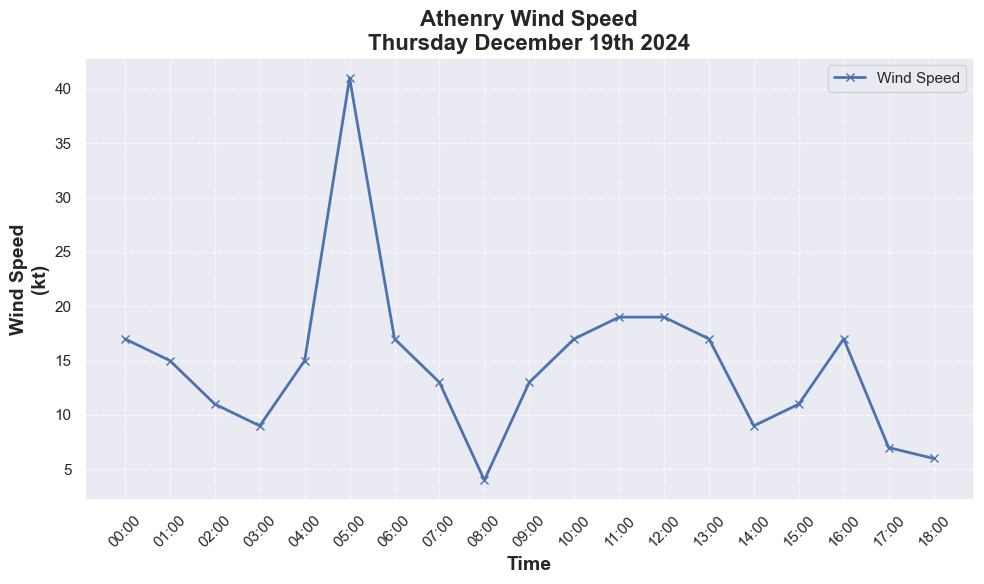

In [17]:
# converting 'reportTime' to datetime, as currently an object
df['reportTime'] = pd.to_datetime(df['reportTime'])

# extracting hour from 'reportTime'
df['hour'] = df['reportTime'].dt.hour

# creating plot
plt.figure(figsize=(10, 6))
plt.plot(df['hour'], df['windSpeed'], marker='x', label='Wind Speed', linewidth=2)

# formatting hours
hours = df['reportTime'].dt.strftime('%H:%M')

# adding label, title, grid
plt.title('Athenry Wind Speed\nThursday December 19th 2024', fontsize=16, weight='bold')
plt.xlabel('Time', fontsize=14, weight='bold')
plt.ylabel('Wind Speed\n(kt)', fontsize=14, weight='bold')
plt.xticks(df['hour'], labels=hours, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()